In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
from scipy import optimize

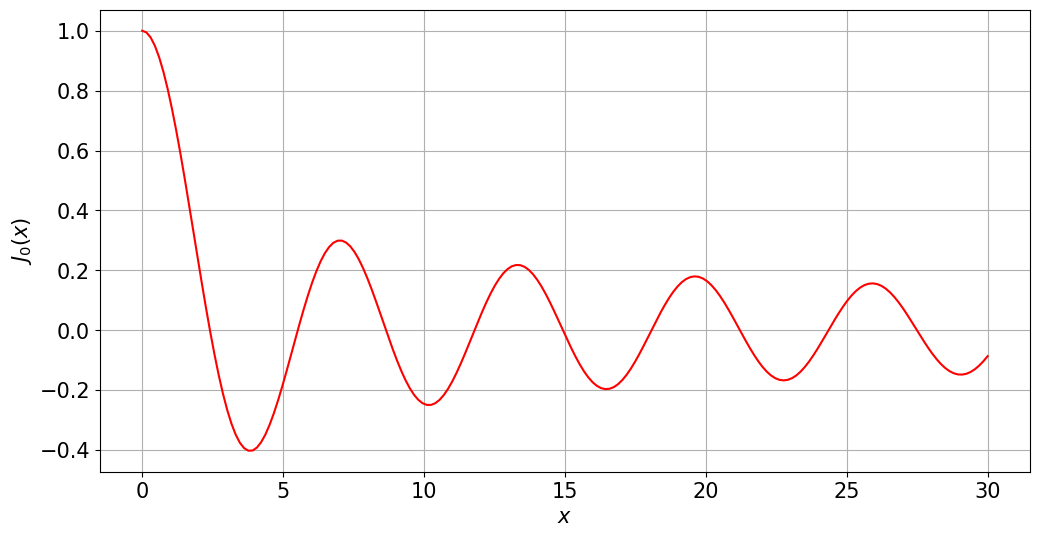

In [6]:
from scipy import special

x = np.linspace(0, 30, 200)
y = special.jn(0, x)

plt.figure(figsize=(12,6))
plt.plot(x, y, '-r', label="$J_0(x)$")
plt.xlabel("$x$")
plt.ylabel("$J_0(x)$")
plt.grid()
plt.savefig("Bessel_Functions.pdf")

In [9]:
def bisection_while(f, xinit, predicate):
    a_n, b_n = xinit 
    f_1st = f(a_n)
    
    #f: 해를 추정하고자 하는 방정식
    #xinit :interval, 간격, 즉 함수에서 [a, b]를 뜻함, 여기선 튜플로 들어감.
    #predicate : 호출 가능, 세 가지 인수를 사용하는 함수를 의미.
    # -i : 반복 횟수
    # -xy : 현재 반복에서 중간점과 함수 값의 쌍
    # -dx : x 값의 변경
    #그리고 boolean을 반환한다, True이면 검색이 계속되고 False이면 검색이 종료된다.
    
    #X_n : 숫자
    #이등분 방법으로 계산된 n번째 구간의 중간점, 초기간격은 a, b로 [a_0, b_0]가 결정됨.
    #위와 마찬가지로 (m_n) == 0인 경우 중간점 m_n = (a_n + b_n)/2이면 함수는 이 솔루션을 반환합니다.
    #만약 값 f(a_n), f(b_n), f(m_n)의 모든 부호가 동일하다면 반복하면 이등분 방법이 실패하고 없음을 반환합니다.
    
    #유효한지 체크
    if f(a_n) * f(b_n) >= 0:
        print("Bisection method fails.")
        return None
    

    i = 1
    x_mid = 0.5 * (a_n + b_n)
    f_mid = f(x_mid)
    
    #cuberoot2_approx = bisection_while(lambda x: x*x*x - 2, (1, 2), 
    #                             lambda i, xy, dx: abs(dx) > 1e-10)
    #lambda는 익명함수라고 이해하면 된다.
    
    #반복

    while predicate(i, (x_mid, f_mid), 0.5 * abs(a_n - b_n)):
        #만약 abs(dx) 값이 적절한 숫자 정도보다 작아질때 까지, 시작하라는 뜻
        #즉 dx 값이 e-10 보다 크면 계속하고, 작으면 멈추는 시스템.
        if f_1st * f_mid > 0: 
            #앞서 이 상황은 a_n과 b_n사이에 0값이 끼어있어야함. (유호체크를 통과했으니)
            #그리고 이 상황을 만족하는 경우는, 즉 a_n보다 해가 +방향에 있기에 
            #a_n을 mid로 잡고 +방향으로 1/2씩 좁혀가는 것.
            a_n = x_mid
            f_1st = f_mid

        else:
            b_n = x_mid 
            #b_n이 당겨짐 -방향으로
            #이때 f_1st는 안변해도 됨 
            #1. f_1st * f_mid 이 0보다 커지면, a_n이 움직이니 상관없고
            #2. f_1st * f_mid 이 여전히 같거나 작으면, b_n이 더 당겨지면 되기에
            
        i = i + 1
        x_mid = 0.5 * (a_n + b_n)
        f_mid = f(x_mid)
        #즉 a_n 과 b_n 간격을 계속해서 줄이주면서, x_mid를 적절하게 옮겨준다.
 
    return x_mid
    
    

[2.404825557678123, 5.520078110333998, 8.653727912955219, 11.79153443899122, 14.930917708406923, 18.07106396794552, 21.21163662985782, 24.352471530728508, 27.493479132041102]


<Figure size 640x480 with 0 Axes>

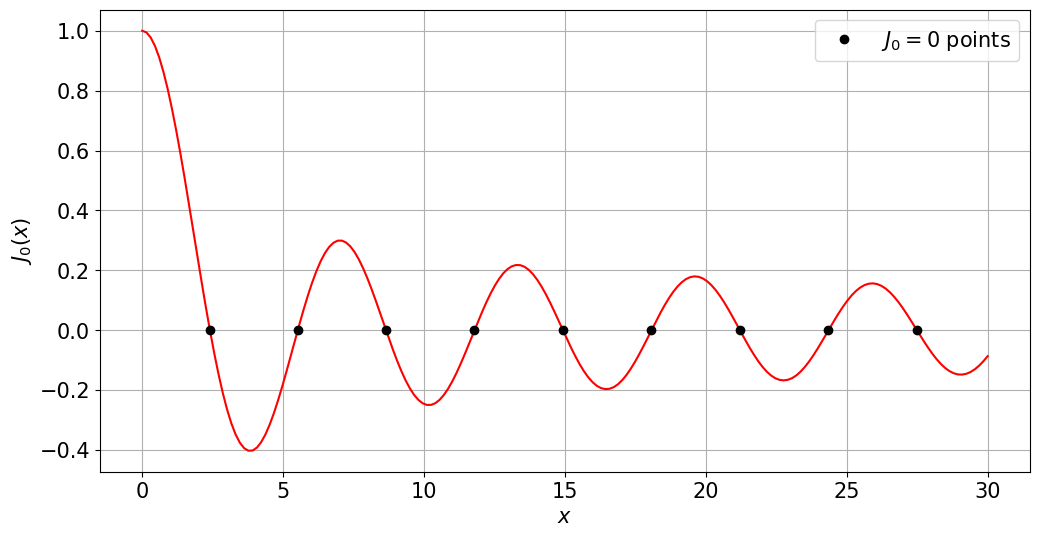

In [15]:
intervals = (0, 5, 7, 10, 13, 16, 20, 23, 25, 28)

x_zeros = []
def f(x):
    return special.jn(0, x)

for ab in zip(intervals[:-1], intervals[1:]):
    f_1_approx_bisection = bisection_while(f, ab, lambda i, xy, dx : abs(dx) > 1e-10)
    x_zeros.append(f_1_approx_bisection)                               
                                           
    #sol = optimize.root_scalar(f, bracket=ab, method='bisect')

   


print(x_zeros)
plt.figure()
plt.figure(figsize=(12,6))
plt.plot(x, y, '-r')
plt.plot(x_zeros, np.zeros_like(x_zeros), 'ok',
         label="$J_0=0$ points")
plt.xlabel("$x$")
plt.ylabel("$J_0(x)$")
plt.grid()
plt.legend()
plt.savefig("Zeros_of_Bessel_Fuctions_Homework1.pdf")

(0, 5)
(5, 7)
(7, 10)
(10, 13)
(13, 16)
(16, 20)
(20, 23)
(23, 25)
(25, 28)


<Figure size 640x480 with 0 Axes>

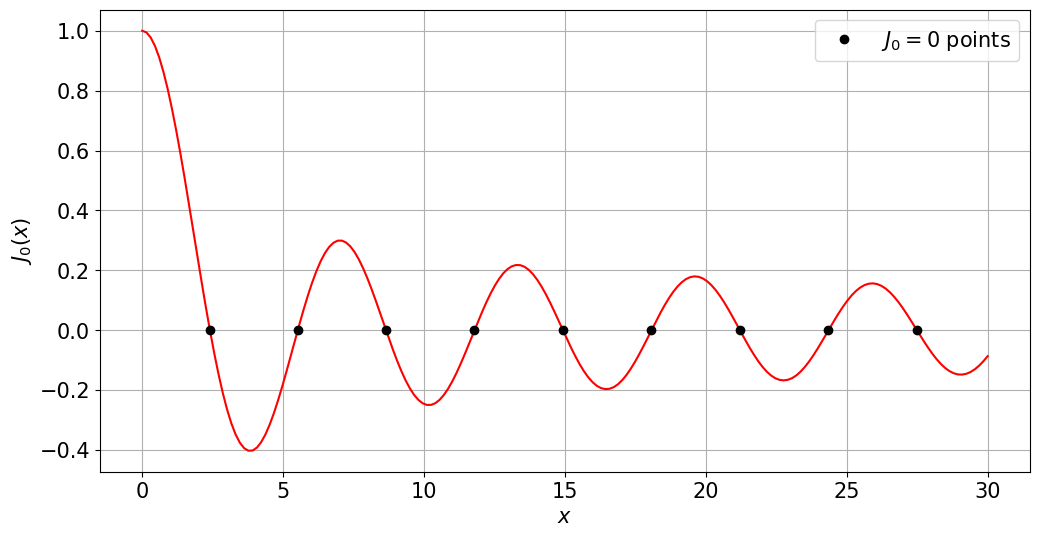

In [4]:
intervals = (0, 5, 7, 10, 13, 16, 20, 23, 25, 28)

x_zeros = []
def f(x):
    return special.jn(0, x)

for ab in zip(intervals[:-1], intervals[1:]):
    sol = optimize.root_scalar(f, bracket=ab, method='bisect')
    print(ab)
    x_zeros.append(sol.root)


plt.figure()
plt.figure(figsize=(12,6))
plt.plot(x, y, '-r')
plt.plot(x_zeros, np.zeros_like(x_zeros), 'ok',
         label="$J_0=0$ points")
plt.xlabel("$x$")
plt.ylabel("$J_0(x)$")
plt.grid()
plt.legend()
plt.savefig("Zeros_of_Bessel_Fuctions_Homework1.pdf")